# Ejemplo 1
Este ejemplo ilustra el uso de la librería Sickit-learn para árboles de decisión, y algunas funciones útiles para hacer una inspección inicial del conjunto de datos a trabajar. El ejemplo se ha construido para el curso de inteligencia artíficial de la Universidad del Magdalena. El conjunto de datos tomado como ejemplo es: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

import warnings

Cargando el conjunto de datos de un archivo extensión .cvs, y mostrando información del archivo.

In [2]:
#Cargando datos
heart = pd.read_csv("./heart.csv")
#Informacion de los datos
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Convirtiendo Variables Categoricas A Numericas 
Sex , ChestPainType , RestingECG , ExerciseAngina , ST_Slope . 
Teniendo en cuenta El orden Factorize , No orden onehotEncoding.


In [3]:
from sklearn import preprocessing

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(heart['Sex'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
heart['Sex'] = targets_trans.toarray()
#no orden

heartclass = heart['ChestPainType']
heartclass_econded, heartclass_categories = heartclass.factorize()
heart['ChestPainType'] = heartclass_econded
#orden

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(heart['RestingECG'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
heart['RestingECG'] = targets_trans.toarray()
#no orden

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(heart['ExerciseAngina'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
heart['ExerciseAngina'] = targets_trans.toarray()
#no orden

heartclass = heart['ST_Slope']
heartclass_econded, heartclass_categories = heartclass.factorize()
heart['ST_Slope'] = heartclass_econded
print(heart.info())
#orden

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    float64
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    float64
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    float64
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 86.2 KB
None


In [4]:
#Resumen de estadísticos
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,1.452070,132.396514,198.799564,0.233115,0.204793,136.809368,0.595861,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.403770,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,2.000000,130.000000,223.000000,0.000000,0.000000,138.000000,1.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,2.000000,140.000000,267.000000,0.000000,0.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,1.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Visualizando la distribución de las clases a través de un histograma.

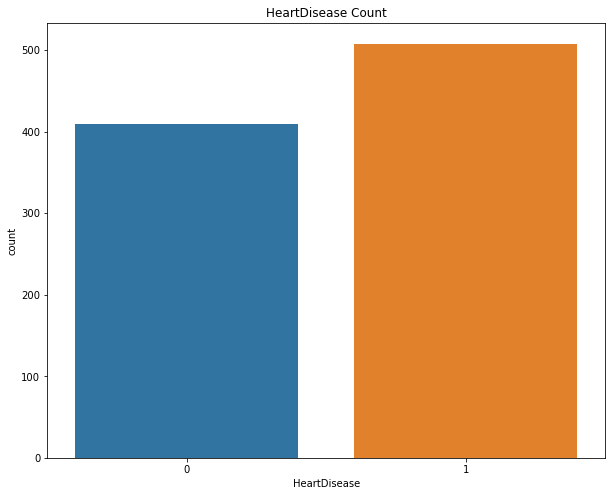

In [5]:
#Histograma del atributo clase
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='HeartDisease',data=heart)
plt.title("HeartDisease Count")
plt.show()

Matriz de Correlacion

<AxesSubplot:>

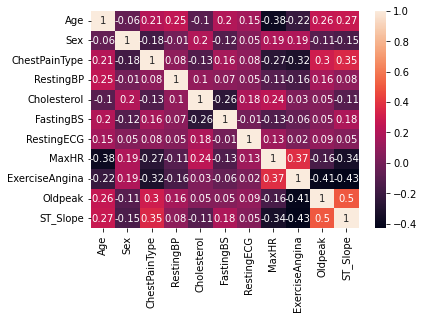

In [6]:
#Matriz de correlación para inspeccionar posibles variables predictoras relacionadas entre sí
X = heart.iloc[:, 0:11]
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [7]:
#aplicando arboles de decisión
#Como los arboles de decisión no son sensibles a la escala de los predictores, vamos a utilizar el conjunto de datos
#original

y_target = heart['HeartDisease']
x_data = heart.drop(['HeartDisease'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.20)

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=20)
clf = clf.fit(x_train,y_train)

#Evaluación en el conjunto de prueba
y_pred = clf.predict(x_test)

print('Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: {:.2f}'.format(clf.score(x_test, y_test))) 
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)

print(classification_report(y_test, y_pred))
print(x_data.columns)

Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: 0.84
[[65 12]
 [18 89]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.88      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


GRAFICANDO LOS RESULTADOS

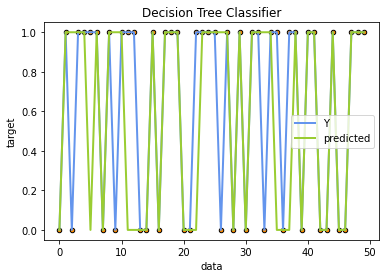

In [8]:
# Plot the results
x =  np.arange(0.0, 50)[:, np.newaxis]
plt.figure()
plt.scatter(x, y_test[:50], s=20, edgecolor="black", c="darkorange")
plt.plot(x, y_test[:50], color="cornflowerblue", label="Y", linewidth=2)
plt.plot(x, y_pred[:50], color="yellowgreen", label="predicted", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Classifier")
plt.legend()
plt.show()

Se utiliza la clase RandomForestClassifier para construir un modelo ensamblado, conformado por varios árboles de decisión, en los resultados se puede ver que el modelo final no queda tan sobreajustado a los datos de entrenamiento, y tiene una mejor evaluación en los datos reservados para la prueba

In [9]:
from sklearn.ensemble import RandomForestClassifier

y_target = heart['HeartDisease']
x_data = heart.drop(['HeartDisease'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.20)

regr = RandomForestClassifier(n_estimators=50, max_depth=20)
regr.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50)

Evalucion del conjunto de prueba

In [10]:
Ytrain_predict2 = regr.predict(x_train)
#rmse = (np.sqrt(mean_squared_error(y_train, Ytrain_predict2)))
#r2 = r2_score(y_train, Ytrain_predict2)

#y_pred = Ytrain_predict2

#Evaluación en el conjunto de prueba
Ytrain_predict2 = clf.predict(x_test)

print('Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: {:.2f}'.format(clf.score(x_test, y_test))) 
cmatrix = confusion_matrix(y_test, Ytrain_predict2)
print(cmatrix)

print(classification_report(y_test, Ytrain_predict2))
print(x_data.columns)

Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: 0.97
[[85  2]
 [ 3 94]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        87
           1       0.98      0.97      0.97        97

    accuracy                           0.97       184
   macro avg       0.97      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


Graficando los resultados


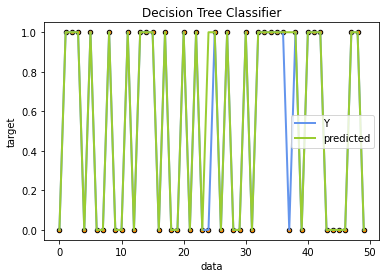

In [11]:
# Plot the results
x =  np.arange(0.0, 50)[:, np.newaxis]
plt.figure()
plt.scatter(x, y_test[:50], s=20, edgecolor="black", c="darkorange")
plt.plot(x, y_test[:50], color="cornflowerblue", label="Y", linewidth=2)
plt.plot(x, Ytrain_predict2[:50], color="yellowgreen", label="predicted", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Classifier")
plt.legend()
plt.show()

GridSearch

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([("scaler" , StandardScaler()),
                     ("rf",RandomForestClassifier())])
from sklearn.model_selection import GridSearchCV
param_grid = {
    'rf__max_depth': [4, 5, 10],
    'rf__max_features': [2, 3],
    'rf__min_samples_leaf': [3, 4, 5],
    'rf__n_estimators': [100, 200, 300]
}
# initialize
grid_pipeline = GridSearchCV(pipeline,param_grid,n_jobs=-1, verbose=1, cv=3, scoring='f1')
# fit
grid_pipeline.fit(x_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
print(grid_pipeline.best_params_)

{'rf__max_depth': 4, 'rf__max_features': 2, 'rf__min_samples_leaf': 5, 'rf__n_estimators': 100}


In [ ]:
print(grid_pipeline.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=4, max_features=2,
                                        min_samples_leaf=5))])


In [ ]:
predictions = grid_pipeline.predict(x_test)
#print(accuracy_score(y_test, predictions))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))
print(x_data.columns)




Confusion matrix:
[[66 13]
 [13 92]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        79
           1       0.88      0.88      0.88       105

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


METRICAS Y GRAFICA

Error cuadrático medio obtenido con los parámetros encontrados por GridSearchCV:


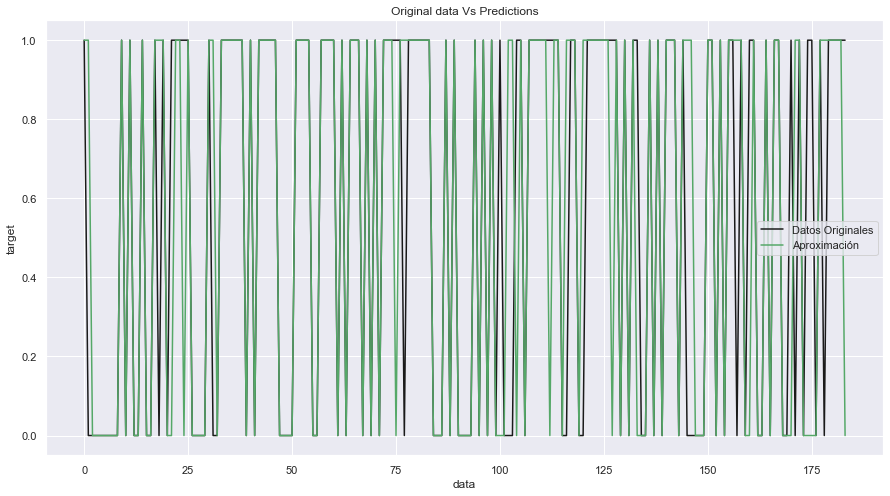

In [ ]:
R_ind = grid_pipeline.best_estimator_  #
new_predictions_R = R_ind.predict(x_test) #Utilizamos los parámetros encontrados para volver 
print('Error cuadrático medio obtenido con los parámetros encontrados por GridSearchCV:')


X = np.arange(0, len(y_test))
plt.figure(figsize=(15,8))
plt.plot(X, y_test, 'k', label='Datos Originales')
plt.plot(X, new_predictions_R, 'g', label='Aproximación')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Original data Vs Predictions')
plt.legend()
plt.show()